In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
from sklearn.datasets import make_regression

(500, 1) (500,)


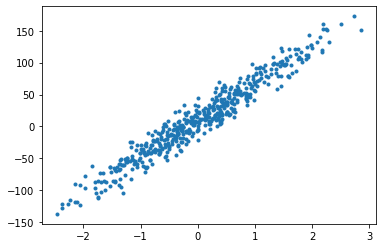

In [0]:
X,y=make_regression(n_samples=500,n_features=1,bias=10,noise=15)#bias shift values from 0 to 10 and noise implies spreadness of data
print(X.shape,y.shape)
plt.plot(X,y,'.')
plt.show()

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train,X_test,y_train,y_test=train_test_split(X,y)

In [0]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(375, 1) (375,)
(125, 1) (125,)


In [0]:
def hypothesis(x,W): #for scalar quantity use lowercase and upercase for vector
    x0=1
    x1=x
    h=W[0]*x0+W[1]*x1
    return h

In [0]:
def get_error(X,W,y_true): #y_true is correct ans column
    err=0.0
    m=X.shape[0]
    for i in range(m):
        err+=(hypothesis(X[i],W)-y_true[i])**2
    err/=2*m
    return err

In [0]:
def gradient_descent(X,W,y_true,learning_rate=0.1):  #learning_rate is value of alpha (0.1 is default set value)
    m=X.shape[0]
    grad0=0.0
    grad1=0.0
    for i in range(m):
        grad0+=(y_true[i]-hypothesis(X[i],W))
        grad1+=(y_true[i]-hypothesis(X[i],W))*X[i]
    grad0/=m
    grad1/=m
    W[0]+=learning_rate*grad0
    W[1]+=learning_rate*grad1
    err=get_error(X,W,y_true)
    return W,err

In [0]:
W=np.array([0.1,0.1])
loss=[]
for i in range(400):
    W,err=gradient_descent(X_train,W,y_train,learning_rate=0.1)
    loss.append(err)
print(W)

[ 9.62141297 57.42226724]


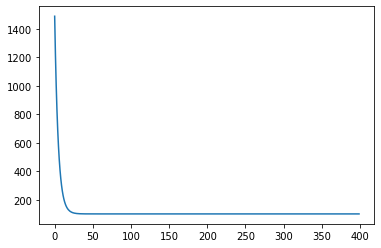

In [0]:
plt.plot(loss)
plt.show()

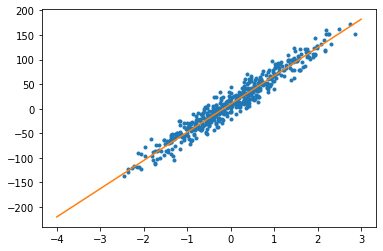

In [0]:
plt.plot(X,y,'.')
x_hyp=np.arange(-4,4)
y_hyp=W[0]+W[1]*x_hyp
plt.plot(x_hyp,y_hyp)
plt.show()

In [0]:
def stochastic_gradient_descent(X,W,y_true,learning_rate=0.1):
    loss=[]
    m=X.shape[0]
    for i in range(m):
        grad0=(y_true[i]-hypothesis(X[i],W))
        grad1=(y_true[i]-hypothesis(X[i],W))*X[i]
        W[0]+=learning_rate*grad0
        W[1]+=learning_rate*grad1
        err=get_error(X,W,y_true)
        loss.append(err)
    return W,loss


In [0]:
W=np.array([0.1,0.1])
W,loss=stochastic_gradient_descent(X_train,W,y_train)
print(W)

[ 8.71107753 60.64095839]


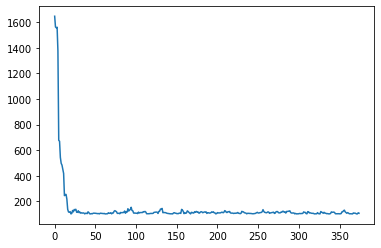

In [0]:
plt.plot(loss)
plt.show()

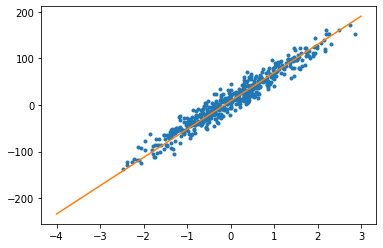

In [0]:
plt.plot(X,y,'.')
x_hyp=np.arange(-4,4)
y_hyp=W[0]+W[1]*x_hyp
plt.plot(x_hyp,y_hyp)
plt.show()

# From sklearn

In [0]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()
regression.fit(X_train,y_train)
regression.score(X_test,y_test)

0.935042229870389

In [0]:
regression.coef_

array([57.42226724])

In [0]:
regression.intercept_

9.621412970416321